In [42]:
%pip install mediapipe opencv-python pandas scikit-learn seaborn numpy ipython



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.6 MB/s eta 0:00:003.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mediapipe as mp 
import cv2


In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [35]:

import csv

# File paths
video = 'illuminati_1.mp4'
csv_file = 'illuminati_1.csv'

# Initialize Mediapipe holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Open video file
cap = cv2.VideoCapture(video)

# Define the scale for resizing
scale_percent = 50  # Resize to 50% of the original size

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Calculate new dimensions
new_width = int(frame_width * scale_percent / 100)
new_height = int(frame_height * scale_percent / 100)

# Open CSV file for writing
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row for the CSV file
    header = ['frame'] + [f'{landmark}_{coord}' for landmark in range(33) for coord in ('x', 'y', 'z', 'visibility')]
    writer.writerow(header)

    # Initialize holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        frame_index = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Resize frame
            frame = cv2.resize(frame, (new_width, new_height))

            # Recolor feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detections
            results = holistic.process(image)

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Check for pose landmarks
            if results.pose_landmarks:
                # Extract pose landmarks
                pose_landmarks = results.pose_landmarks.landmark
                landmarks = [frame_index] + [coord for landmark in pose_landmarks for coord in (landmark.x, landmark.y, landmark.z, landmark.visibility)]
                writer.writerow(landmarks)

                # Draw pose landmarks on the frame
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

            # Display the frame
            cv2.imshow('Image', image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

            frame_index += 1

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1718282656.922010   17380 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1718282656.922871   22967 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1718282656.984212   22964 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718282656.999367   22959 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718282657.000254   22962 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718282657.000293   22961 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tenso

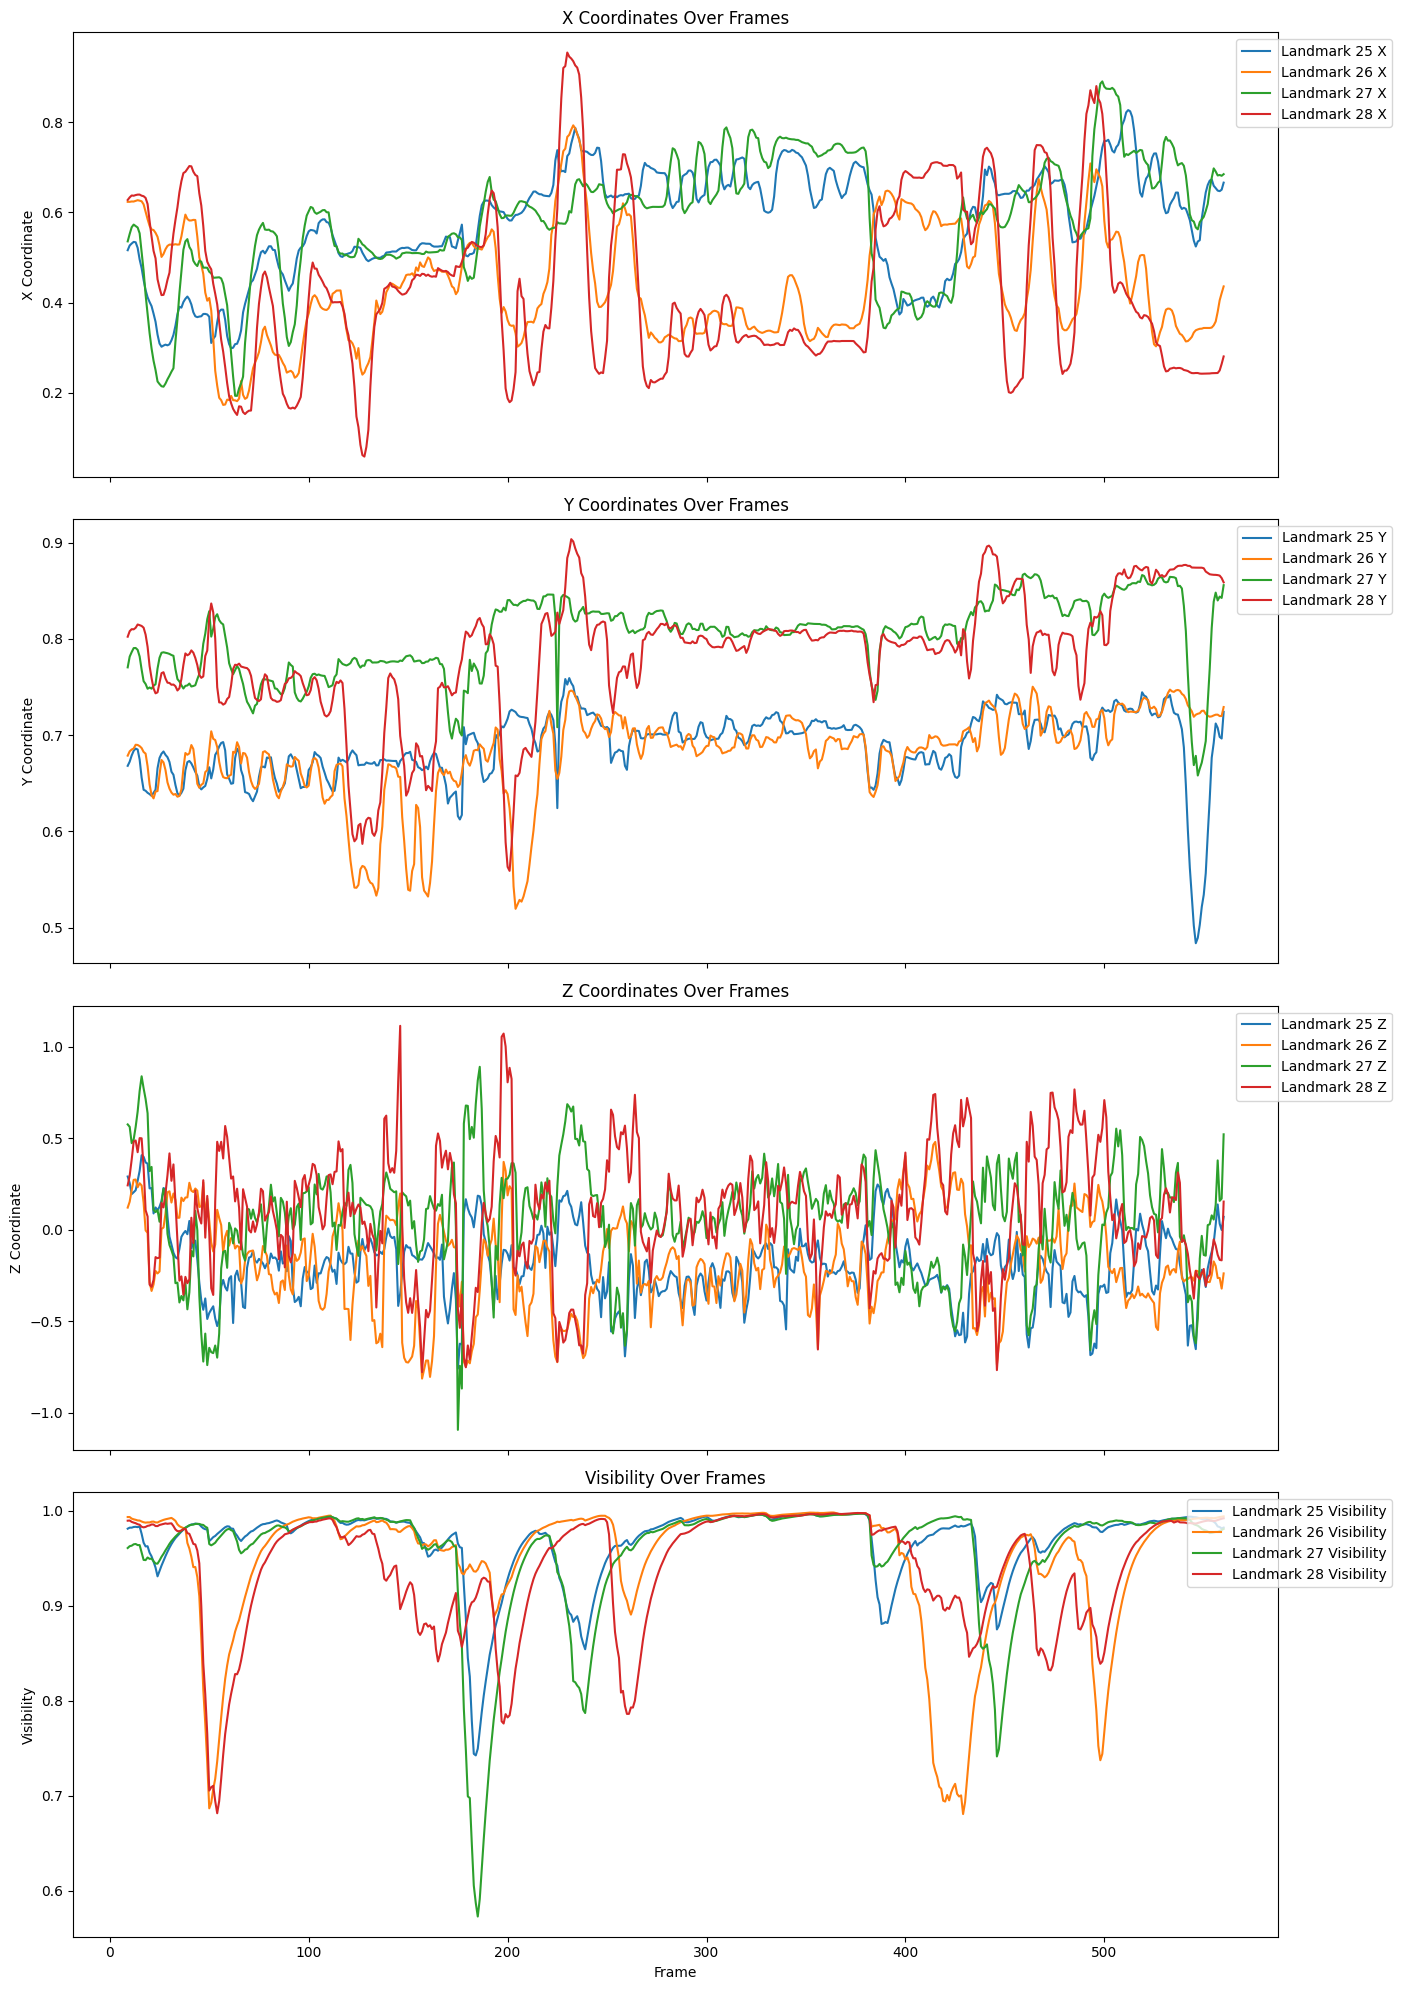

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
csv_file = 'illuminati_1.csv'
data = pd.read_csv(csv_file)

# Function to plot multiple landmarks over frames in four separate graphs
def plot_landmarks_separately(data, landmarks_indices):
    frames = data['frame']
    fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

    for landmark_index in landmarks_indices:
        x = data[f'{landmark_index}_x']
        y = data[f'{landmark_index}_y']
        z = data[f'{landmark_index}_z']
        visibility = data[f'{landmark_index}_visibility']
        
        axs[0].plot(frames, x, label=f'Landmark {landmark_index} X')
        axs[1].plot(frames, y, label=f'Landmark {landmark_index} Y')
        axs[2].plot(frames, z, label=f'Landmark {landmark_index} Z')
        axs[3].plot(frames, visibility, label=f'Landmark {landmark_index} Visibility')

    axs[0].set_ylabel('X Coordinate')
    axs[1].set_ylabel('Y Coordinate')
    axs[2].set_ylabel('Z Coordinate')
    axs[3].set_ylabel('Visibility')
    
    axs[3].set_xlabel('Frame')
    
    axs[0].set_title('X Coordinates Over Frames')
    axs[1].set_title('Y Coordinates Over Frames')
    axs[2].set_title('Z Coordinates Over Frames')
    axs[3].set_title('Visibility Over Frames')
    
    for ax in axs:
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    
    plt.tight_layout()
    plt.show()

# List of landmarks to plot
landmarks_to_plot = [25, 26, 27, 28]

# Plot the specified landmarks
plot_landmarks_separately(data, landmarks_to_plot)
